In [17]:
from PIL import Image
from matplotlib.pyplot import imshow
import pandas
import matplotlib.pylab as plt
import os
import glob
import skillsnetwork

import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import skillsnetwork 

In [18]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

In [20]:
#await skillsnetwork.prepare("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip", path = "resources/data", overwrite=False)

In [21]:
directory="resources/data/"
negative='Negative'


negative_file_path=os.path.join(directory,negative)
negative_file_path
os.listdir(negative_file_path)[0:3]
[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path)][0:3]

print("test.jpg".endswith(".jpg"))
print("test.mpg".endswith(".jpg"))

negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
negative_files.sort()
negative_files[0:3]

True
False


['resources/data/Negative/00001.jpg',
 'resources/data/Negative/00002.jpg',
 'resources/data/Negative/00003.jpg']

In [22]:
positive="Positive"

positive_file_path=os.path.join(directory,positive)
positive_files=[os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path) if file.endswith(".jpg")]
os.listdir(positive_file_path)[0:3]
[os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path)][0:3]

positive_files = [os.path.join(positive_file_path, file) for file in os.listdir(positive_file_path) if file.endswith(".jpg")]
positive_files.sort()
positive_files[0:3]

['resources/data/Positive/00001.jpg',
 'resources/data/Positive/00002.jpg',
 'resources/data/Positive/00003.jpg']

In [23]:
image1 = Image.open(negative_files[0])

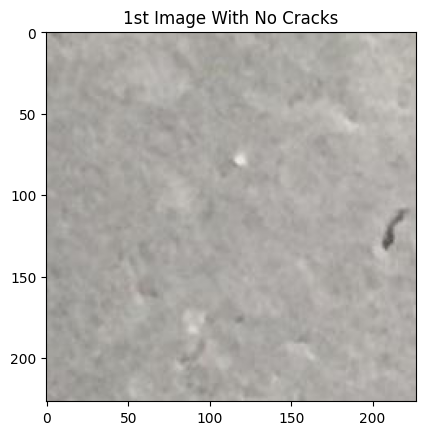

In [24]:
plt.imshow(image1)
plt.title("1st Image With No Cracks")
plt.show()

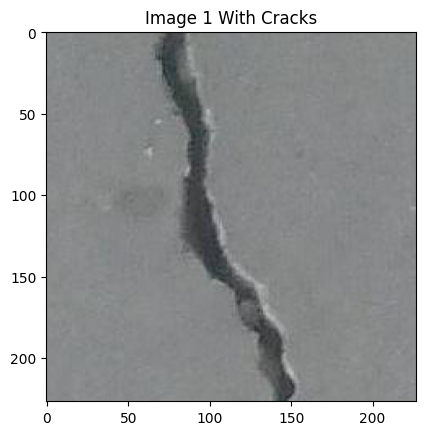

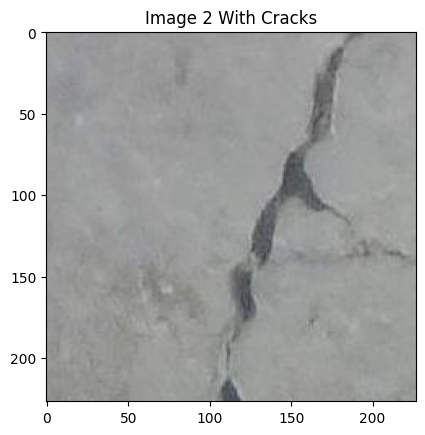

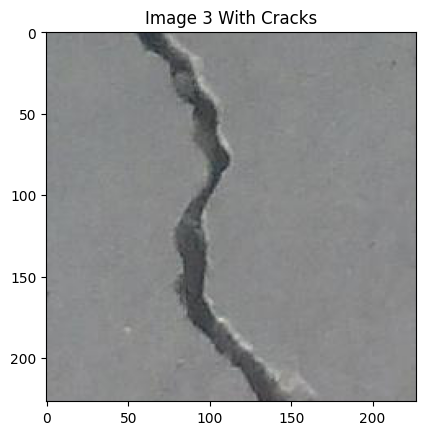

In [25]:
for i in range(3):
    image = Image.open(positive_files[i])
    plt.imshow(image)
    plt.title(f"Image {i+1} With Cracks")
    plt.show()

In [26]:
number_of_samples = len(positive_files) + len(negative_files)
number_of_samples

40000

In [27]:
Y=torch.zeros([number_of_samples])
Y=Y.type(torch.LongTensor)
Y.type()
Y[::2]=1
Y[1::2]=0

In [28]:
class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None,train=True):
        directory="resources/data"
        positive="Positive"
        negative="Negative"

        positive_file_path=os.path.join(directory,positive)
        negative_file_path=os.path.join(directory,negative)
        positive_files=[os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path) if file.endswith(".jpg")]
        positive_files.sort()
        negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
        negative_files.sort()

        self.all_files=[None]*number_of_samples
        self.all_files[::2]=positive_files
        self.all_files[1::2]=negative_files 
        # The transform is goint to be used on image
        self.transform = transform
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0
        
        if train:

            self.Y=self.Y[0:30000]
            self.len=len(self.all_files)
        else:

            self.Y=self.Y[30000:]
            self.len=len(self.all_files)
    
  
            
     
       
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        
        image=Image.open(self.all_files[idx])
        y=self.Y[idx]
          
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

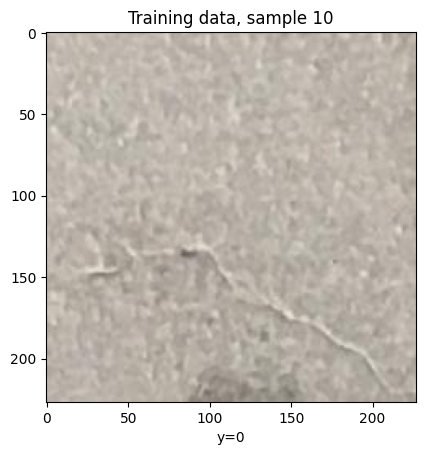

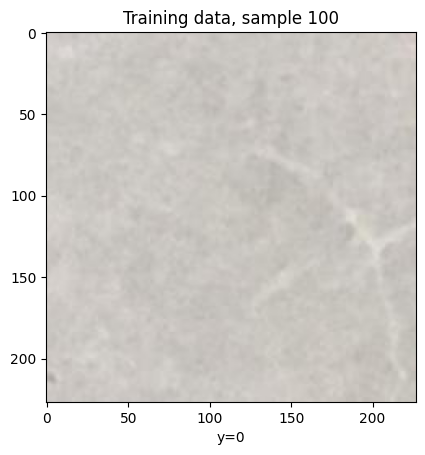

In [29]:
# Create the Dataset object for training data
dataset = Dataset(train=True)

# Print the 10th sample
sample_10 = dataset[9]
plt.imshow(sample_10[0])
plt.xlabel("y=" + str(sample_10[1].item()))
plt.title("Training data, sample 10")
plt.show()

# Print the 100th sample
sample_100 = dataset[99]
plt.imshow(sample_100[0])
plt.xlabel("y=" + str(sample_100[1].item()))
plt.title("Training data, sample 100")
plt.show()

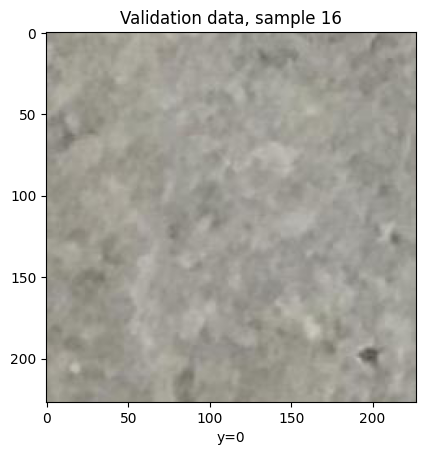

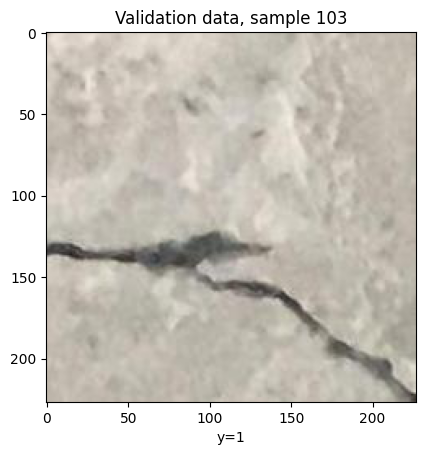

In [30]:
# Create the Dataset object for validation data
validation_dataset = Dataset(train=False)

# Print the 16th sample
sample_16 = validation_dataset[15]
plt.imshow(sample_16[0])
plt.xlabel("y=" + str(sample_16[1].item()))
plt.title("Validation data, sample 16")
plt.show()

# Print the 103rd sample
sample_103 = validation_dataset[102]
plt.imshow(sample_103[0])
plt.xlabel("y=" + str(sample_103[1].item()))
plt.title("Validation data, sample 103")
plt.show()

Training Dataset:


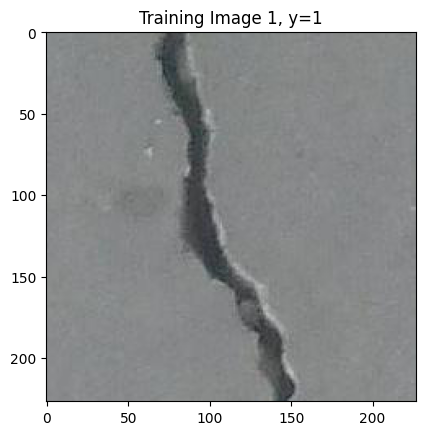

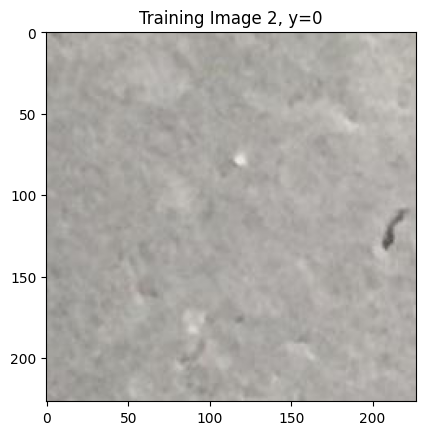

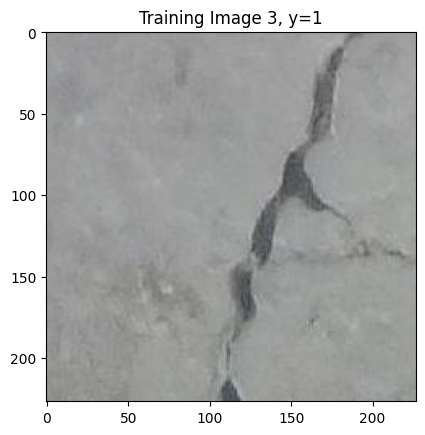

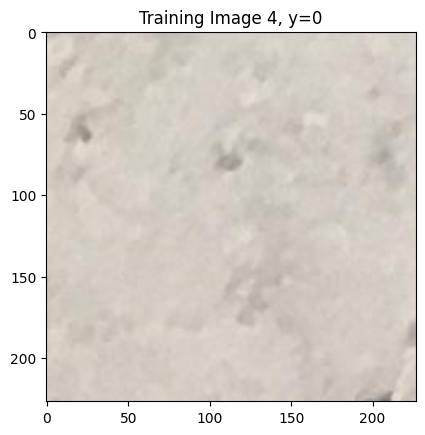

Validation Dataset:


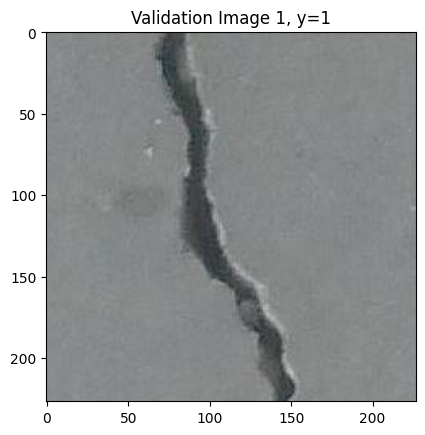

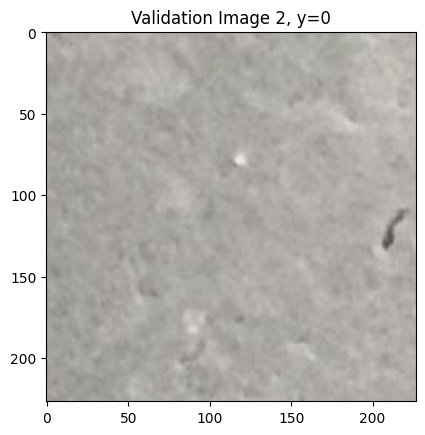

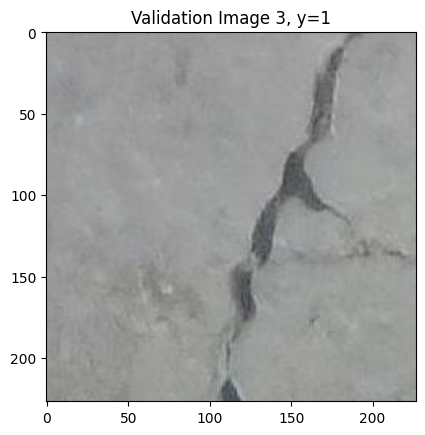

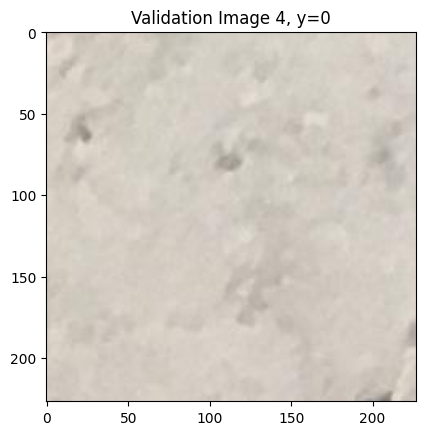

In [31]:
# Display the first four images from the training dataset
print("Training Dataset:")
for i in range(4):
    image, label = dataset[i]
    plt.imshow(image)
    plt.title(f"Training Image {i+1}, y={label.item()}")
    plt.show()

# Display the first four images from the validation dataset
print("Validation Dataset:")
for i in range(4):
    image, label = validation_dataset[i]
    plt.imshow(image)
    plt.title(f"Validation Image {i+1}, y={label.item()}")
    plt.show()